In [2]:
#fashion MNIST - Image Classification

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

tf.set_random_seed(777)  # for reproducibility
print(tf.__version__)

1.14.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

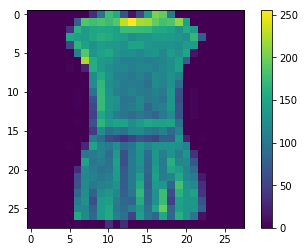

In [5]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

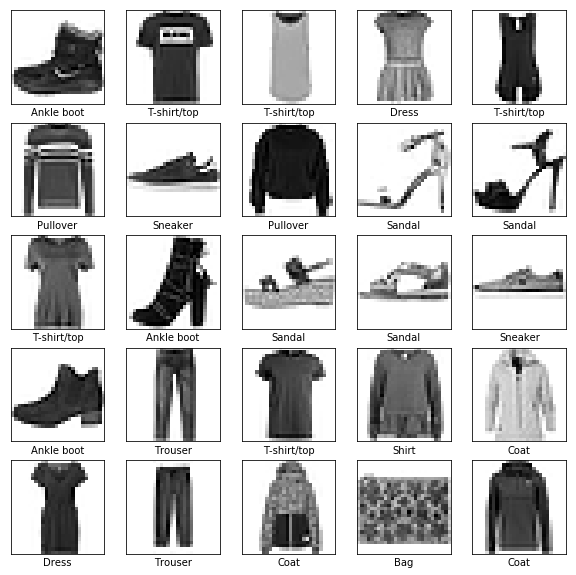

In [6]:

# scaler
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

W0909 00:06:03.181122 4769793472 deprecation.py:506] From /Users/seungmi/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# adam optimizer, cross entropy loss
# 5 epoch

In [8]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.5028 - acc: 0.8231
Epoch 2/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3726 - acc: 0.8655
Epoch 3/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3391 - acc: 0.8747
Epoch 4/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3148 - acc: 0.8836
Epoch 5/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2947 - acc: 0.8913


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 16us/sample - loss: 0.3658 - acc: 0.8661
Test accuracy: 0.8661


In [10]:
predictions = model.predict(test_images)

In [11]:
np.argmax(predictions[0])
#ankle boot

9

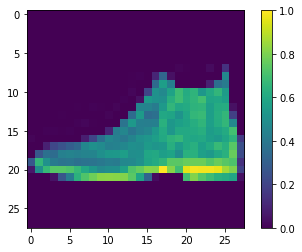

In [13]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)

1


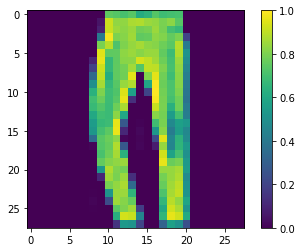

In [18]:
print(np.argmax(predictions[5]))
#trousers
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)